In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from pandas import DataFrame, read_csv
from pathlib import Path
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import numpy as np
import pickle

In [3]:
news_df = read_csv(Path('../arquivos/news_data_prep.csv'), parse_dates=[4])

In [4]:
stock = 'VALE3'
stock_df = news_df[news_df['code']==stock]

In [5]:
stock_df.value_counts(stock_df['cls_influence'])

cls_influence
-1    804
 1    684
dtype: int64

In [47]:
train, test, cls_train, cls_test = train_test_split(stock_df['prep_text'], 
                                                    stock_df['cls_influence'],
                                                    test_size = 0.25,
                                                    stratify=stock_df['cls_influence'],
                                                    random_state = 42)

In [64]:
tfidf = TfidfVectorizer(ngram_range=(1,3)
                        , max_df=0.15
                        , min_df=0.001
                        , sublinear_tf=True)
                        # , max_features=10000)

In [65]:
tfidf_fit = tfidf.fit(train)
tfidf_train = tfidf.transform(train)
tfidf_test = tfidf.transform(test)

In [66]:
model = MultinomialNB()
model.fit(tfidf_train, cls_train)
# scores = cross_val_score(model, tfidf_train, cls_train, cv=4)
# print(scores)

MultinomialNB()

In [67]:
train_score = model.score(tfidf_train, cls_train)
test_score = model.score(tfidf_test, cls_test)
print('Train accuracy: ', train_score)
print('Test accuracy: ', test_score)

Train accuracy:  0.9229390681003584
Test accuracy:  0.6344086021505376


### Matriz de confusão

In [11]:
predict = model.predict(tfidf_test)

In [12]:
cf_matrix = confusion_matrix(cls_test, predict)

<AxesSubplot:>

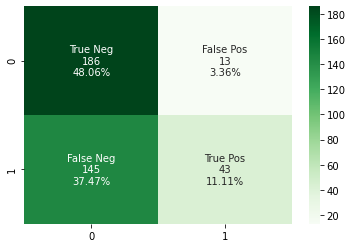

In [13]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

In [68]:
pickle_file = stock + '_pickle'
with open(pickle_file, 'wb') as f:
    pickle.dump(model, f)
tfidf_file = stock + '_tfidf'
with open(tfidf_file, 'wb') as f:
    pickle.dump(tfidf_fit, f)

In [15]:
# teste do pickle
# with open(pickle_file, 'rb') as f:
#     pmodel = pickle.load(f)
# with open(tfidf_file, 'rb') as f:
#     tfidf_pk = pickle.load(f)

In [16]:
# tfidf_train = tfidf_pk.transform(train)
# tfidf_test = tfidf_pk.transform(test)

In [17]:
# train_score = pmodel.score(tfidf_train, cls_train)
# test_score = pmodel.score(tfidf_test, cls_test)
# print('Train accuracy: ', train_score)
# print('Test accuracy: ', test_score)